Using this to import the required libraries

In [10]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Reading the data: Sample example

In [2]:
pwd

'/Users/apple/Desktop/2020Win/Python/Project'

In [3]:
conn = sqlite3.connect('./data/FPA_FOD_20170508.sqlite')

In [4]:
conn

### Dataset description: Important keys

Here are some useful keys needed for extraction from the dataset
- FIRE_YEAR
- DISCOVERY_DATE
- FIRE_SIZE: Area in hectares
- FIRE_SIZE_CLASS: (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres)
- LATITUDE
- LONGITUDE
- STATE

In [5]:
data_dates = pd.read_sql_query("SELECT fire_year, discovery_date FROM fires;", conn)

In [6]:
data_size = pd.read_sql_query("SELECT fire_size, fire_size_class FROM fires;", conn)

## Plot time-related things

In [7]:
data_dates['FIRE_SIZE'] = data_size['FIRE_SIZE']

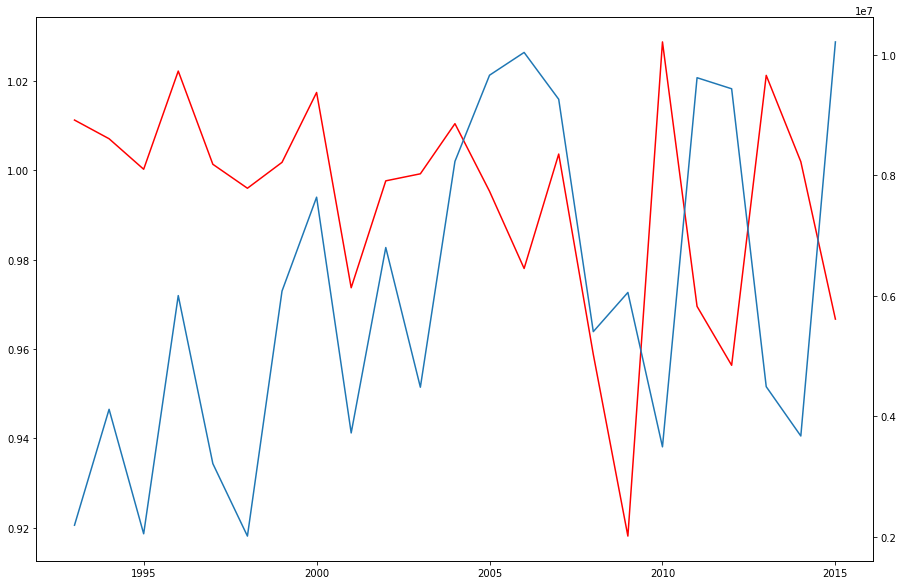

In [12]:
# plot the emission increase along with fire size of a year
emis = pd.read_csv("./co-emissions-per-capita.csv",index_col='Year', thousands=",")
emis = emis[emis['Code']=='USA']
fire = data_dates.groupby(by='FIRE_YEAR',as_index=True).sum()
df = pd.merge(left=emis,right=fire,left_index=True,right_index=True,how='inner')
df['emission'] = df['Per capita CO₂ emissions (tonnes per capita)']

df_n = df[['emission','FIRE_SIZE']]
df_n = df_n.sort_index(ascending=True)
df_n['emission_increase'] = [0]+[ df['emission'][i]/df['emission'][i-1] for i in df.index[1:]]

%matplotlib inline
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()
ax1.plot(df_n['emission_increase'][1:],color='r')
ax2.plot(df_n['FIRE_SIZE'][1:])

In [13]:
# plot the emission increase along with fire size of a year
# another emission data set
emis = pd.read_csv("./greenhouse_gas_inventory_data_data.csv",index_col='year', thousands=",")
gas = emis['category'].unique()
emis.head()

,country_or_area,value,category
year,,,
2014,Australia,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
2013,Australia,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2012,Australia,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
2011,Australia,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
2010,Australia,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [15]:
emis.shape

(8406, 3)

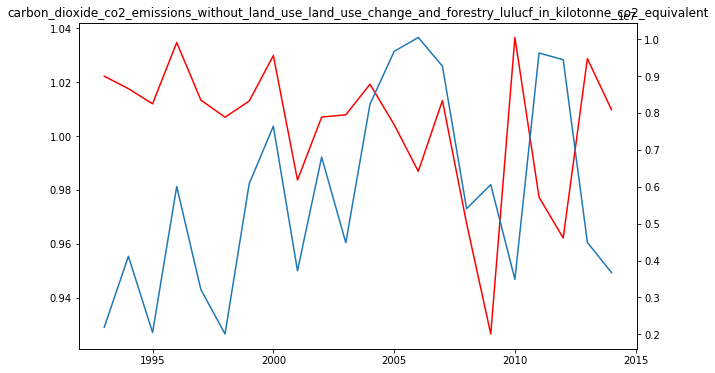

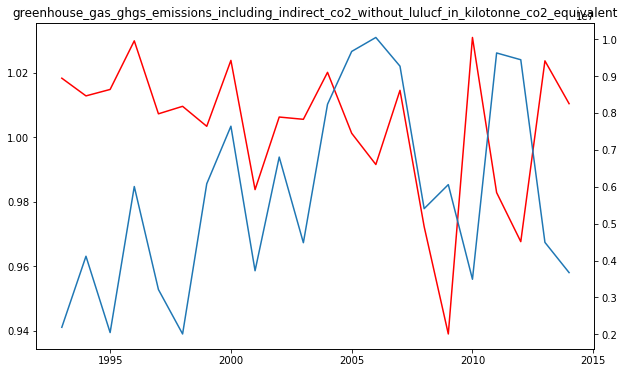

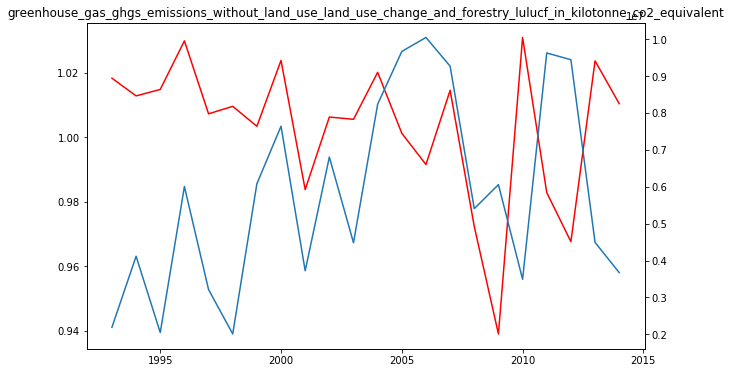

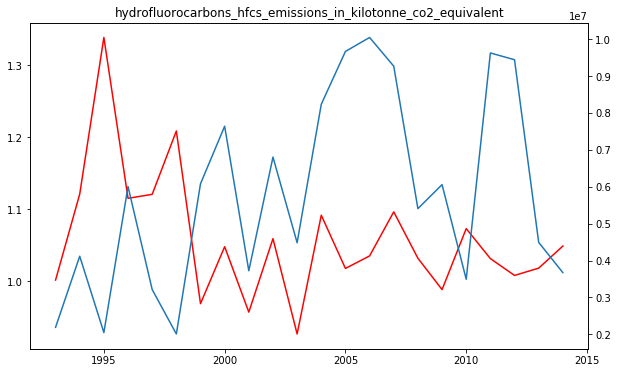

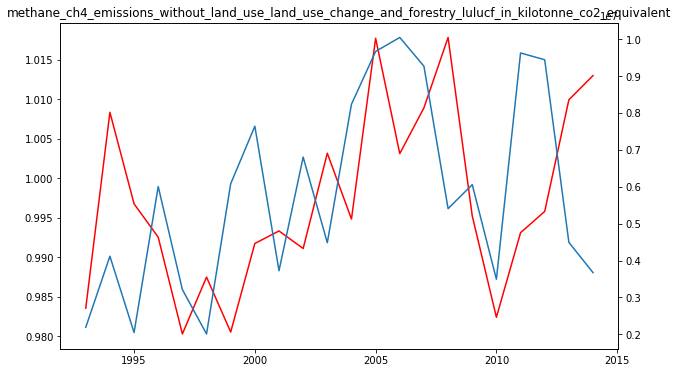

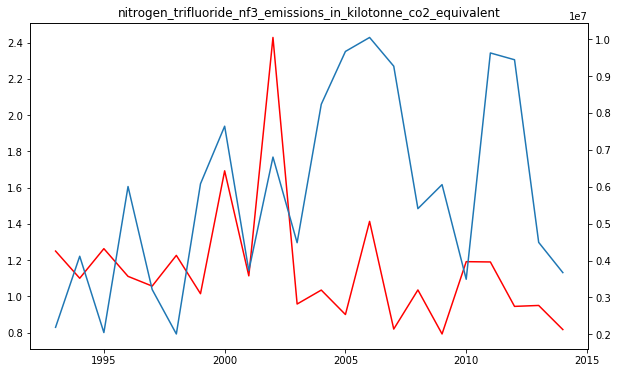

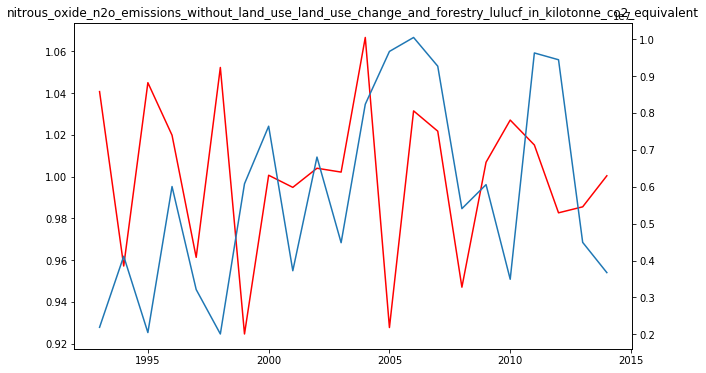

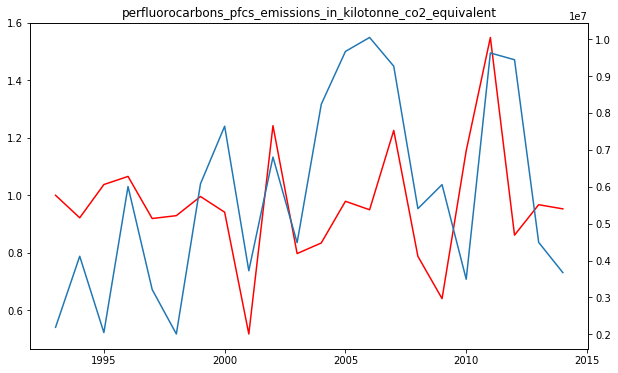

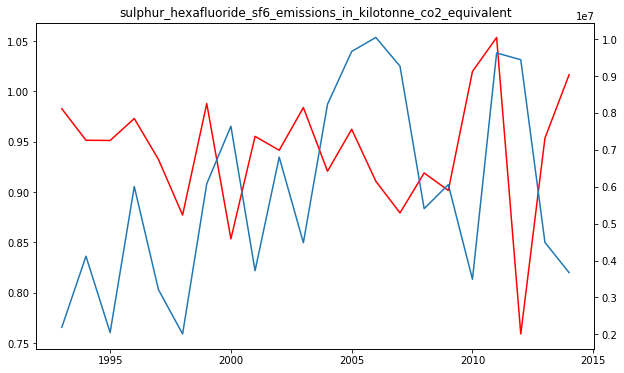

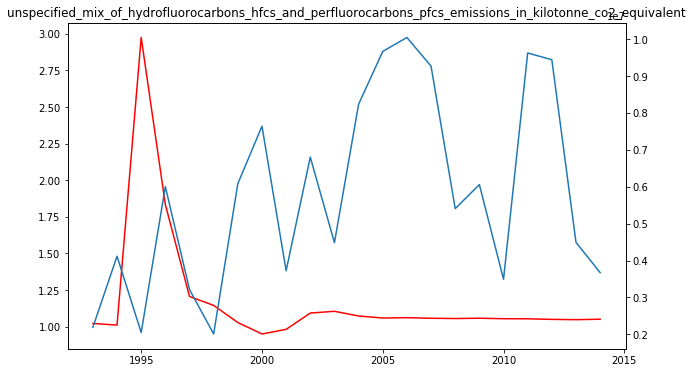

In [16]:
def plotemis(gas, data_dates, emis):
    df = emis[emis['country_or_area']=='United States of America']
    df = df[df['category']==gas]
    
    fire = data_dates.groupby(by='FIRE_YEAR',as_index=True).sum()
    df = pd.merge(left=df, right=fire, left_index=True, right_index=True, how='inner')

    df_n = df[['value','FIRE_SIZE']]
    df_n = df_n.sort_index(ascending=True)
    df_n['emission_increase'] = [0]+[ df_n['value'][i]/df_n['value'][i-1] for i in df_n.index[1:] ]

    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()
    ax1.plot(df_n['emission_increase'][1:],color='r')
    ax2.plot(df_n['FIRE_SIZE'][1:])
    plt.title(str(gas))
    
for gas_cate in gas:
    plotemis(gas_cate, data_dates, emis)

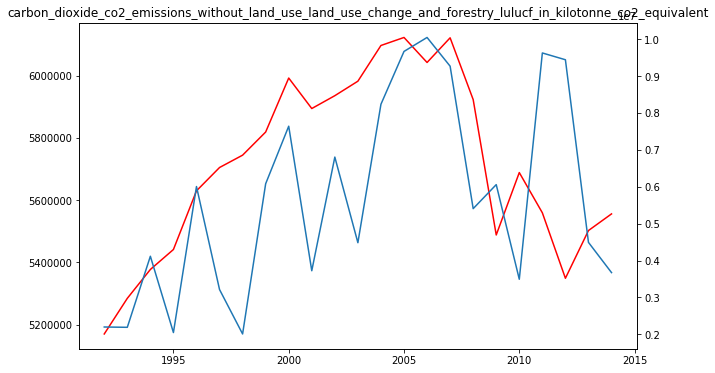

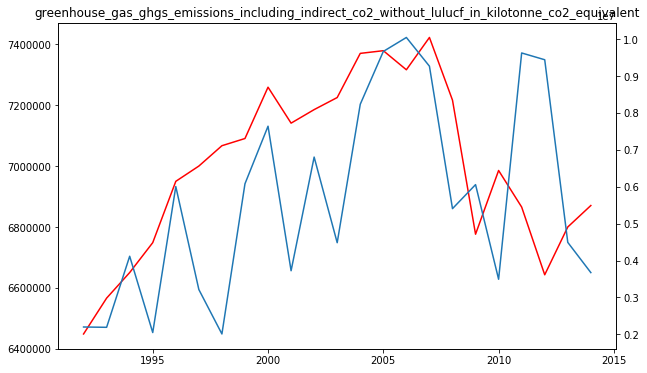

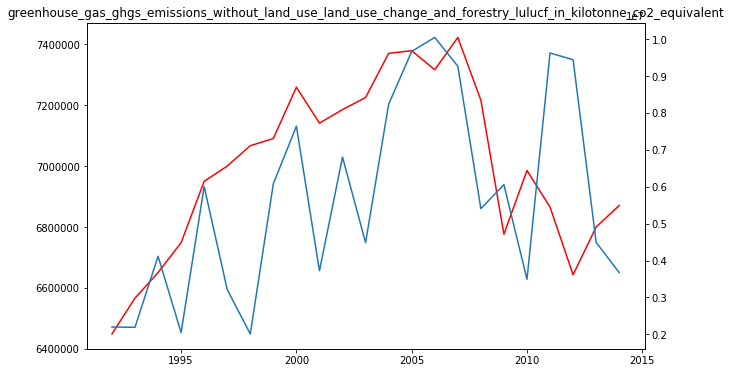

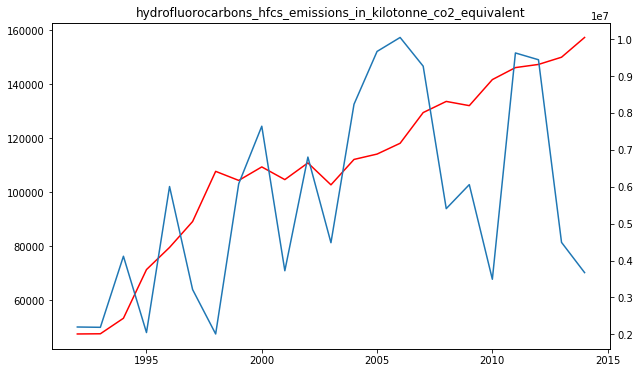

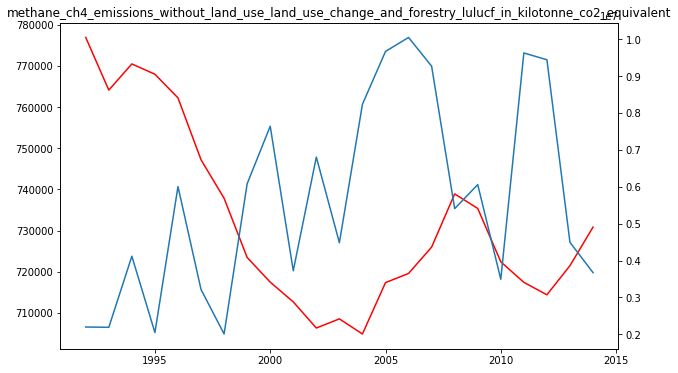

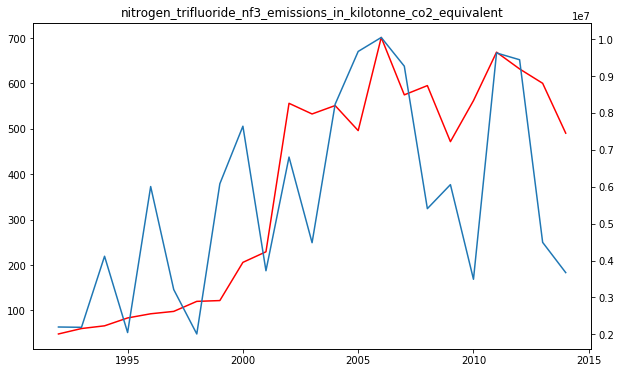

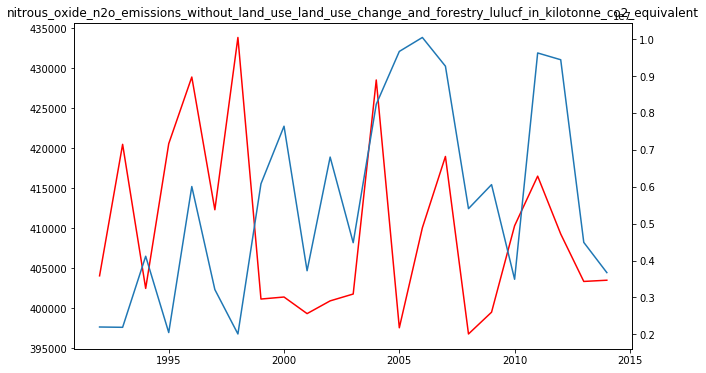

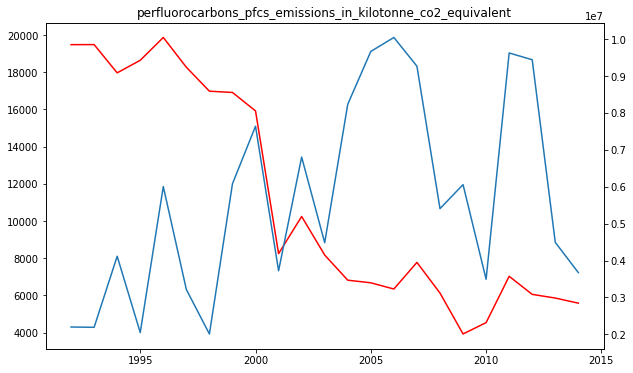

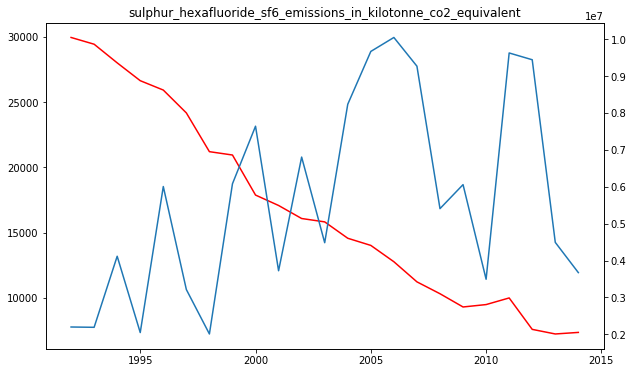

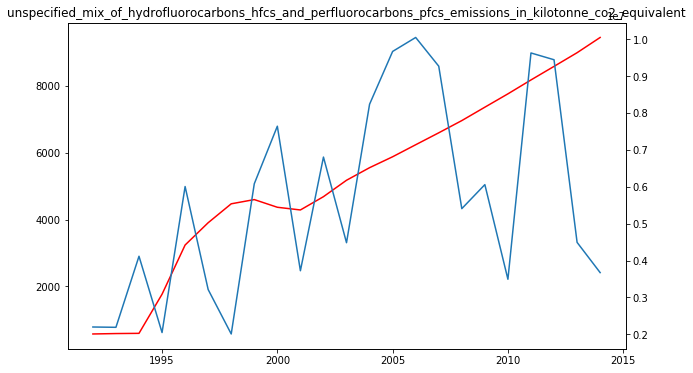

In [18]:
# instead of increase, we plot abosolute value
def plotemis(gas, data_dates, emis):
    df = emis[emis['country_or_area']=='United States of America']
    df = df[df['category']==gas]
    
    fire = data_dates.groupby(by='FIRE_YEAR',as_index=True).sum()
    df = pd.merge(left=df, right=fire, left_index=True, right_index=True, how='inner')

    df_n = df[['value','FIRE_SIZE']]
    df_n = df_n.sort_index(ascending=True)
    #df_n['emission_increase'] = [0]+[ df_n['value'][i]/df_n['value'][i-1] for i in df_n.index[1:] ]

    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()
    ax1.plot(df_n['value'],color='r')
    ax2.plot(df_n['FIRE_SIZE'])
    plt.title(str(gas))
    
for gas_cate in gas:
    plotemis(gas_cate, data_dates, emis)